In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import imghdr
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
data_directory="helmet classify"
img_ext=["jprg","jpg","bmp","png"]

In [3]:
for img_cls in os.listdir(data_directory):
    for im in os.listdir(os.path.join(data_directory,img_cls)):
        img_path=os.path.join(data_directory,img_cls,im)
        try: 
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e: 
            print('Issue with image {}'.format(img_path))


Issue with image helmet classify\not wearing\5d1c158f45786.jpg
Issue with image helmet classify\not wearing\70484555.jpg
Issue with image helmet classify\not wearing\Challan-for-Driving-Without-Helmet-in-India-Effective-from-2.jpg
Issue with image helmet classify\not wearing\d03jfomg_taapsee-pannu_625x300_18_November_20.jpg
Issue with image helmet classify\not wearing\dc-Cover-1rcu9l009pqgced3r4tb3ae853-20170829072643-Medi.jpeg
Issue with image helmet classify\not wearing\guy-rides-moped-helmet-without-260nw-719930032.jpg
Issue with image helmet classify\not wearing\helmetless-rider-904536-1603183220.jpg
Issue with image helmet classify\not wearing\ht-pune_23311e08-9976-11e7-baba-4acd69b87684.jpg
Issue with image helmet classify\not wearing\illustration-happy-child-riding-motorcycle-260nw-1744542722.jpg
Issue with image helmet classify\not wearing\image (1).jpeg
Issue with image helmet classify\not wearing\image (10).jpeg
Issue with image helmet classify\not wearing\image (11).jpeg
Iss

Issue with image helmet classify\wearing\72.jpg
Issue with image helmet classify\wearing\73.jpg
Issue with image helmet classify\wearing\74.jpg
Issue with image helmet classify\wearing\75.jpg
Issue with image helmet classify\wearing\76.jpg
Issue with image helmet classify\wearing\77.jpg
Issue with image helmet classify\wearing\78.jpg
Issue with image helmet classify\wearing\79.jpeg
Issue with image helmet classify\wearing\80.jpg
Issue with image helmet classify\wearing\81.jpg
Issue with image helmet classify\wearing\82.jpg
Issue with image helmet classify\wearing\83.jpeg
Issue with image helmet classify\wearing\84.jpeg
Issue with image helmet classify\wearing\85.jpg
Issue with image helmet classify\wearing\86.jpg
Issue with image helmet classify\wearing\87.jpg
Issue with image helmet classify\wearing\88.jpeg
Issue with image helmet classify\wearing\89.jpg
Issue with image helmet classify\wearing\90.jpg
Issue with image helmet classify\wearing\91.jpg
Issue with image helmet classify\wea

In [7]:
data=tf.keras.utils.image_dataset_from_directory(data_directory)
data

Found 223 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
data_item=data.as_numpy_iterator()

In [9]:
dataimg=data_item.next()

In [10]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

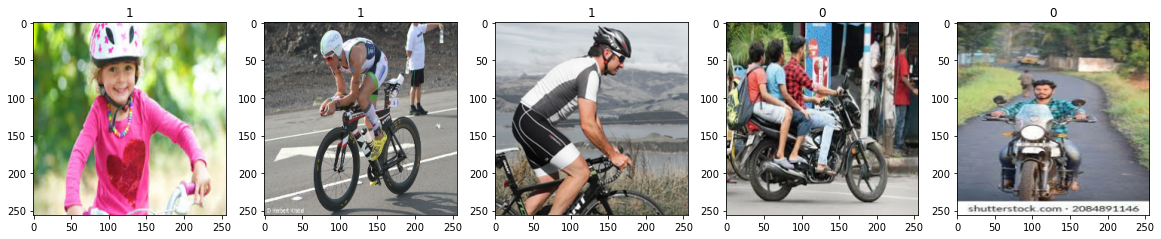

In [11]:
fig,ax=plt.subplots(ncols=5,figsize=(20,20))
for i,ig in enumerate(dataimg[0][:5]):
    ax[i].imshow(ig.astype(int))
    ax[i].title.set_text(dataimg[1][i])

In [12]:
data=data.map(lambda x,y:(x/255,y))
data

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)

In [14]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [15]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model = Sequential([
Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
MaxPooling2D(),
Conv2D(32, (3,3), 1, activation='relu'),
MaxPooling2D(),
Conv2D(16, (3,3), 1, activation='relu'),
MaxPooling2D(),
Flatten(),
Dense(256, activation='relu'),
Dense(1, activation='sigmoid') 
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [18]:
model.compile('adam',
              loss="BinaryCrossentropy", metrics=['accuracy'])

In [ ]:
model.fit(train,epochs=20,validation_data=val)

In [ ]:
test_img=cv2.imread("1657136906875.jpeg")
plt.imshow(test_img)
plt.show()

In [ ]:
resized_image=tf.image.resize(test_img,(256,256))

In [ ]:

plt.imshow(resized_image.numpy().astype(int))

In [ ]:
pred=model.predict(np.expand_dims(resized_image/255,0))
pred

In [ ]:
if pred>0.50:
    print("wearing helmet")
else:
    print("not wearing helmet")